## Fall 2023: CHEME 5660 Take Home Prelim 2 (THP2)
You are choosing to invest $V_{B}$ USD in one of two possible investments:
<div>
    <center>
        <img src="figs/CHEME-5660-L1c-AbstractAssets-Fall-2023.png" width="680"/>
    </center>
</div>

* __Investment A__: Purchase a `52-Week` Treasury Bill (`T-bill`) at auction for $V_{B}$ USD, with an annualized investment rate of $\bar{r}$ = `5.488%`, and semi-annual compounding. At the term of the `T-bill` we recieve the face (par) value of the bill $V_{P}=$ 100 USD.
* __Investment B__: Invest $V_{B}$ USD in $n_{o}$ shares of [SPYD](https://finance.yahoo.com/quote/SPYD/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAANiorcaltDNUCtp01qZd0GAF86DY9ajVMBq8fpt9wPQJKA2M7XgMOWvsfeDsrJxSlpMUKrWYfPDaC9XhnhQ2uCQnfWqvJIdpkimycwOTPv_QySkAzvnIju10jMrqSK7KdsX4ATgr0VtRlF6up-NuK5jDvJx1v2NSlxu1RGQTCAxR), an [ETF](https://www.investopedia.com/terms/e/etf.asp) that provides investment results that correspond to the total return of the S&P 500 High Dividend Index. The share price of [SPYD](https://finance.yahoo.com/quote/SPYD/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAANiorcaltDNUCtp01qZd0GAF86DY9ajVMBq8fpt9wPQJKA2M7XgMOWvsfeDsrJxSlpMUKrWYfPDaC9XhnhQ2uCQnfWqvJIdpkimycwOTPv_QySkAzvnIju10jMrqSK7KdsX4ATgr0VtRlF6up-NuK5jDvJx1v2NSlxu1RGQTCAxR) at the time of purchase is $S_{\circ}$ = 34.57 USD/share. You hold the [SPYD](https://finance.yahoo.com/quote/SPYD/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAANiorcaltDNUCtp01qZd0GAF86DY9ajVMBq8fpt9wPQJKA2M7XgMOWvsfeDsrJxSlpMUKrWYfPDaC9XhnhQ2uCQnfWqvJIdpkimycwOTPv_QySkAzvnIju10jMrqSK7KdsX4ATgr0VtRlF6up-NuK5jDvJx1v2NSlxu1RGQTCAxR) shares for `52-Weeks`, collecting quarterly dividend payments of $\text{1.78}\times{n_{\circ}}$ USD during the term. At the end the term, you collect a final dividend payment and liquidate your $n_{\circ}$ shares at $S_{T}$ USD/share. 

Using the Net Present Value (NPV) as your decision rule, on a risk-neutral basis, which investment should you choose? 

### Assumptions
* Assume the annualized risk-free rate equals the investment rate of the `T-bill`, $\bar{r}$ = `5.488%`.
* Assume the `T-bill` uses a discrete discounting model with $m$ = 2 compounding events per-year 
* Assume the `SPYD` shares use continuous discounting

### Setup

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-5660-Take-Home-Prelim-2-Fall-2023/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Take-Home-Prelim-2-Fall-2023/Manifest.toml`
  Activating project at `~/Desktop/julia_work/CHEME-5660-Take-Home-Prelim-2-Fall-2023`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Take-Home-Prelim-2-Fall-2023/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Take-Home-Prelim-2-Fall-2023/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Take-Home-Prelim-2-Fall-2023/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Take-Home-Prelim-2-Fall-2023/Manifest.toml`


### Constants

In [39]:
# Parameters for investment A
T = "52-Week" |> securityterm; # duration of investment A (in years)
r̄ = 0.05488;  # investment rate (annualized rosk-free rate)
dcm = DiscreteCompoundingModel(); # discrete discount/compounding model
ccm = ContinuousCompoundingModel(); # continuous discount/compounding model
Vₚ = 100.0; # par value of the T-bill
n = 2; # number of compounding periods per year for the T-bill
V̄B = 94.757389; # price of T-bill observed at auction

# Parameters for investment B
Sₒ = 34.57; # initial share price of SPYD
σ̂ = 0.1818; # estimated volatility for SPYD
Δt = (1.0/252.0); # time-step for SPYD 
number_of_samples = 25000; # number of random samples for the SPYD distribution

## Investment A: Treasury Bill with a `52-Week` term to maturity
Compute the price $V_{B}$ USD of the `T-bill`, save this value in the `VB` variable. First, build (and populate) an instance of the `MyUSTreasuryZeroCouponBondModel` using the problem parameters, save this in the `tbill_model` variable.
* You'll need to pass in a value for the `par` parameter, the `rate` parameter, the `n` parameter and the duration parameter `T` into the `build(...)` method

In [3]:
tbill_model = build(MyUSTreasuryZeroCouponBondModel, (
    par = Vₚ, rate = r̄, n = n, T = T
)) |> dcm;

Next, get the computed price from the `tbill_model` variable by accessing the `price` field, save this value in the `VB` variable:

In [4]:
VB = tbill_model.price;

#### a) Check your computed price for the `T-bill`
The price reported at the Treasury auction on `10/03/23` for this `T-bill` was $\bar{V}_{B}$ = 94.757389 `USD`. Let's compute the percentange differece between our computed price and the price observed at auction:

$$
\epsilon = \left(\frac{V_{B} - \bar{V}_{B}}{\bar{V}_{B}}\right)\times\text{100}
$$

In [5]:
ϵ = ((VB - V̄B)/V̄B)*100;

If $\text{abs}\left(\epsilon\right)\leq~0.01$, we can continue. Use the `@assert ...` macro to check the error condition on the computed Treasury bill prices:

In [6]:
# Test: are the prices "close"?
@assert abs(ϵ) ≤ 0.01

#### b) Compute the Net Present Value (NPV) of Investment A
Finally, we can compute the NPV for `investment A`,  save this value in the `NPV_A` variable:

In [7]:
NPV_A = nothing; # fill me in (hint: don't over think this ...)

## Investment B: Purchase shares of `SPYD`, hold for `52-Weeks`
The challenge to computing the Net Present Value (NPV) _today_ of Investment B is the estimation of the final share price of `SPYD` at term, denoted as $S_{T}$. Toward this challenge, let's construct a Geometric Brownian Motion (GBM) model to predict the future price, where we estimate the drift parameter $\mu$ from `2023` price data, and use the option's markets estimate for the volatility parameter $\sigma$ = 0.1818.

### Background
[Geometric Brownian motion (GBM)](https://en.wikipedia.org/wiki/Geometric_Brownian_motion) is a continuous-time stochastic process model in which the random variable $S(t)$, e.g., the share price of `XYZ` is described by a deterministic drift corrupted by a [Wiener process](https://en.wikipedia.org/wiki/Wiener_process):

$$\frac{dS}{S} = {\mu}dt + \sigma{dW}$$

The constant $\mu$ denotes a drift parameter, $\sigma$ indicates a volatility parameter, and $dW$ represents the output of a [Wiener process](https://en.wikipedia.org/wiki/Wiener_process).  Using [Ito's lemma](https://en.wikipedia.org/wiki/Itô%27s_lemma), we can formulate an analytical solution to the GBM equation:

$$S(t) = S_{\circ}\exp\Biggl[\left(\mu-\frac{\sigma^{2}}{2}\right)\left(t - t_{\circ}\right) + (\sigma\sqrt{t-t_{\circ}})\cdot{Z_{t}(0,1)}\Biggr]$$

where $S_{\circ}$ denotes the share price at $t_{\circ}$, and $Z_{t}(0,1)$ denotes a [standard normal random variable](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution) at time $t$. For Geometric Brownian Motion (GBM) analytical expressions are available for both the expected value and the variance of the share price. The expected share price is given by:

$$\mathbb{E}\left(S_{t}\right) = S_{o}\exp\left(\mu\cdot\Delta{t}\right)$$

where $\Delta{t} = t-t_{o}$ and $S_{o}$ denotes the share price at $t=t_{o}$. On the other hand the variance of the share price $\text{Var}(S_{t})$ at time $t$ is given by:

$$\text{Var}\left(S_{t}\right) = S_{\circ}^{2}e^{2\mu\cdot\Delta{t}}\left[e^{\sigma^{2}{\Delta{t}}} - 1\right]$$

#### Prerequisites
Before we begin modeling the share price of `SPYD`, let's load the Year-to-Date (YTD) price dataset for `SPYD` (from `01/03/23` to `10/13/23`) by calling the `MySPYDDataSet()` function (which returns the data as a `DataFrame`). Save this data in the `firm_data` variable:

In [11]:
firm_data = MySPYDDataSet();

#### a) Estimate the drift parameter $\mu$
Let $\mathbf{A}$ denote a $\mathcal{S}\times{2}$ matrix, where each row corresponds to a time value. The first column of $\mathbf{A}$ is all 1's while the second column holds the $(t_{k}-t_{\circ})$ values. Further, let $\mathbf{Y}$ denote the `ln` of the price values of `firm_id` (in the same order as the $\mathbf{A}$ matrix). Then, the y-intercept and slope (drift parameter) can be estimated by solving the `overdetermined` system of equations:

$$\mathbf{A}\mathbf{\theta} + \mathbf{\epsilon} = \mathbf{Y}$$

where $\mathbf{\theta}$ denotes the vector of unknown parameters. This system can be solved as:

$$\mathbf{\theta} = (\mathbf{A}^{T}\mathbf{A})^{-1}\mathbf{A}^{T}\mathbf{Y} - (\mathbf{A}^{T}\mathbf{A})^{-1}\mathbf{A}^{T}\mathbf{\epsilon}$$

where $\mathbf{A}^{T}$ denotes the transpose of the matrix $\mathbf{A}$, and $(\mathbf{A}^{T}\mathbf{A})^{-1}$ denotes the inverse of the square matrix product $\mathbf{A}^{T}\mathbf{A}$. Finally, we can estimate the error term $\mathbf{\epsilon}$ by calculating the residuals:

$$\mathbf{\epsilon} = \mathbf{Y} - \mathbf{A}\mathbf{\theta}$$

and fitting a normal distribution to the residuals to compute the uncertainty in the estimate of the mean of the drift parameter $\hat{\mu}$. Initially, let's neglect modeling the residuals $\mathbf{\epsilon}$ and consider only the mean solution:

In [12]:
number_of_trading_days = nrow(dataset);
all_range = range(1,stop=number_of_trading_days,step=1) |> collect;
T_all = all_range*Δt .- Δt;
    
A = [ones(number_of_trading_days) T_all];
Y = log.(firm_data[!,:volume_weighted_average_price]);

# Solve the normal equations -
θ = inv(transpose(A)*A)*transpose(A)*Y;

In [17]:
μ̂ = θ[2];

#### b) Estimate the final share price $S_{T}$ distribution
Now, let's estimate the distribution of possible final share prices for `SPYD` by sampling, and compare that distribution to a `Normal` distribution constructed from the analytical expected value and variance expressions.

First, create an instance of the `MyGeometricBrownianMotionEquityModel` using the `build(...)` method, pass in the drift `μ` and volatility `σ` parameters as arguments in the `build(...)` method. Save the GBM model in the `gbm_model` variable:

In [21]:
gbm_model = build(MyGeometricBrownianMotionEquityModel, (
            μ = μ̂, σ = σ̂ ));

Next, sample the `gbm_model` using the `sample(...)` function. Set the initial share price to $S_{o}$ (specified in `constants`), the inital time $T_{1}$ = 0.0, the final time $T_{2}$ = 1.0, and the `number_of_paths` equal to the `number_of_samples` (specidied in `constants`). Save the samples in the `X` array: 

In [43]:
T₁ = 0.0;
T₂ = (252)*Δt
X = sample(gbm_model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt), 
    number_of_paths = number_of_samples);

Now that we have the samples `X`, we can construct an analytical version of the potential share price distribution, where we assume the $S_{T}$ values are [Normally distributed](https://en.wikipedia.org/wiki/Normal_distribution). First, compute the `expectation` and `variance` arrays using the `𝔼(...)` and `Var` functions:

In [27]:
expectation = 𝔼(gbm_model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt));
variance = Var(gbm_model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt));

Next, build a `Normal` distribution from the analytical values for the expectation and variance of the share price $S_{T}$:

In [45]:
d = Normal(expectation[end], sqrt(variance[end]));

Now, let's plot the `X` and values from the `d` distribution:

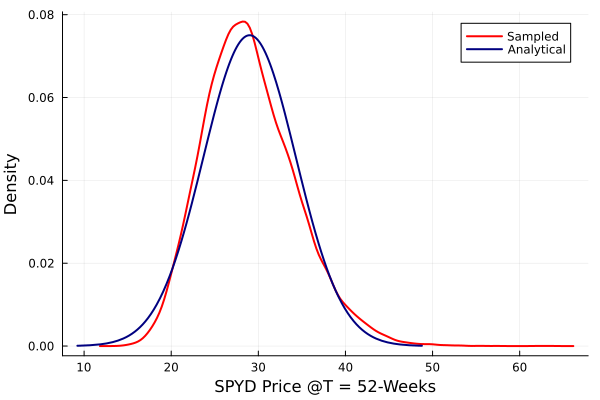

In [47]:
density(X[end,2:end], normalize=true, xlabel="SPYD Price @T = 52-Weeks", 
    ylabel="Density", label="Sampled", c=:red,lw=2)
plot!(d, label="Analytical", c=:navyblue,lw=2)

#### c) Compute the Net Present Value (NPV) of Investment B by sampling the $S_{T}$ distribution

In [49]:
𝒟(r,t) = exp(r*t); # specify continuous discount factor function

Compute the number of shares that we purchase at the start of `investment B`, we are investing $V_{B}$ USD. Save the number of shares purchased in the $n_{\circ}$ variable:

In [50]:
nₒ = VB/Sₒ

2.741049467821086

Next, let's compute the NPV for investment B, where we consider `number_of_samples` possible futures. In particular, suppose in each possible future, we draw a sample from the `Normal` share price distribution model `d`, and compute the NPV using this value for $S_{T}$. We repeat this procedure for each possible future. 